# FlipKart Reviews Sentiment Analysis using Python
analysis of reviews and ratings will enable making others aware of their experience and moreover about the quality of the product and brand.

My task is to predict whether the review given is positive or negative.

### Importing Libraries

In [16]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

For text analysis I will be using NLTK library. and from that we will also require stopword, so will download it and import it down below

In [17]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

loading the data set to colab using the folowing code

In [18]:
import io
import os
from google.colab import files

# Specify the filename
filename = 'flipkart_data.csv'

# Check if the file already exists and delete it if it does
if filename in os.listdir():
    os.remove(filename)

# Upload the file
uploaded = files.upload()


Saving flipkart_data.csv to flipkart_data.csv


Now loading the data using the io library

In [19]:
data = pd.read_csv(io.BytesIO(uploaded['flipkart_data.csv']),encoding = 'latin-1').dropna(axis = 1)

In [20]:
# view the first few rows of the dataset
data.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


### Preprocessing and cleaning the reviews
asthe data is multi labled first i will exproll those labels then i will convert them into 2 classes

In [21]:
# unique ratings
pd.unique(data['rating'])

array([5, 4, 1, 3, 2])

<Axes: xlabel='rating', ylabel='count'>

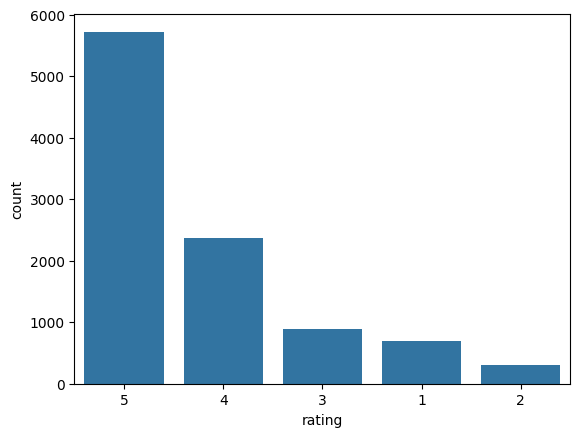

In [22]:
# Lets view the count plot
sns.countplot(data = data,
              x = 'rating',
              order = data.rating.value_counts().index)

In [23]:
# rating label(final)
pos_neg = []
for i in range(len(data['rating'])):
  if data['rating'][i] >= 5:
    pos_neg.append(1)
  else:
    pos_neg.append(0)

data['label'] = pos_neg

## Function for processing the data

In [24]:
from tqdm import tqdm

def preprocess_text(text_data):
  preprocessed_text = []

  for sentence in tqdm(text_data):
    # Removing punctuations
    sentence = re.sub(r'[^\w\s]', '', sentence)

    # Converting lowercase and removing stopwords
    preprocessed_text.append(' '.join(token.lower()
                                      for token in nltk.word_tokenize(sentence)
                                      if token.lower() not in stopwords.words('english')))
  return preprocessed_text

In [25]:
### Impliment the function
preprocessed_review = preprocess_text(data['review'].values)
data['review'] = preprocessed_review

100%|██████████| 9976/9976 [00:32<00:00, 307.96it/s]


In [26]:
data.head()

,review,rating,label
0,nice produt like design lot easy carry looked ...,5,1
1,awesome soundvery pretty see nd sound quality ...,5,1
2,awesome sound quality pros 78 hrs battery life...,4,0
3,think good product per quality also design qui...,5,1
4,awesome bass sound quality good bettary long l...,5,1


### Analysing of the data set
lets check how many counts are there for positive and negative sentiments

In [27]:
data['label'].value_counts()

1    5726
0    4250
Name: label, dtype: int64

To have the better picture of the importance of the words lets create the Wordcloud of all the words with label = 1

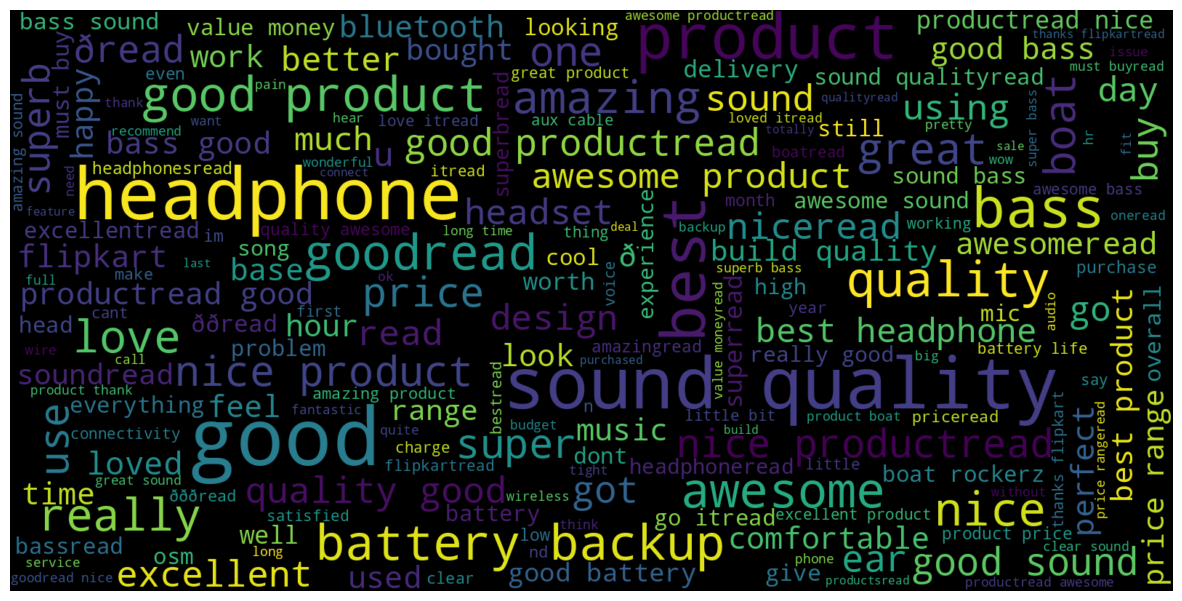

In [28]:
consolidated = ' '.join(
    word for word in data['review'][data['label'] == 1].astype(str)
)
wordCloud = WordCloud(width = 1600, height = 800, random_state = 21, max_font_size = 110)

plt.figure(figsize = (15,10))
plt.imshow(wordCloud.generate(consolidated), interpolation = 'bilinear')
plt.axis('off')
plt.show()

Words like Good, nice, product, headphone have high frequency  in positive review, this satisfy my assumptions.

### Converting Text into Vectors
TF-IDF calculates how relevant a word in a series or corpus is to a text.The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus(data-set)

In [29]:
cv = TfidfVectorizer(max_features = 2500)
X = cv.fit_transform(data['review']). toarray()

In [30]:
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Model Training, Evaluation and prediction
first I have to train-test split the dataset

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['label'],
                                                    test_size=0.33,
                                                    stratify=data['label'],
                                                    random_state = 42)

## Now lets Train Model using Decision Tree for prediction


In [34]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)

# Testing the model
pred = model.predict(X_train)

In [35]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, pred))

0.9269789016908574


## The confusion Matrix

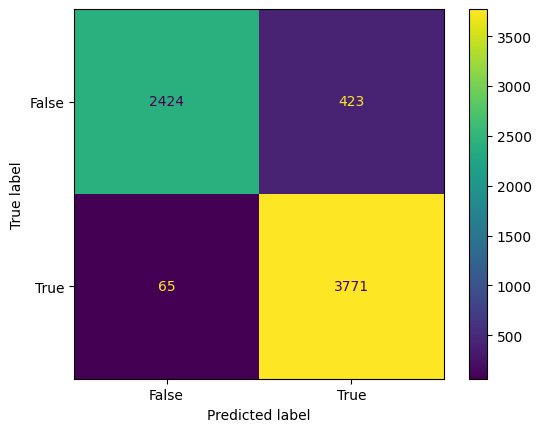

In [37]:
from sklearn import metrics
cm = metrics.confusion_matrix (y_train, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix= cm,
                                            display_labels = [False, True])
cm_display.plot()
plt.show()

# Conclusion
Decision Tree Classifier is performing well with this data. In future, we can also work with large data.
by Joseph wathome